# Boston Pricing Dataset

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

# import plotting libraries
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from IPython.display import display

# model visualizatio library
from tensorflow.keras.utils import plot_model

# data - preprocessing libs
from sklearn import preprocessing

random_seed=42

### 1. Dataset acquisition and Pre-processing

In [29]:
from tensorflow.keras.datasets import boston_housing
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (404, 13)
Training labels shape: (404,)
Testing data shape: (102, 13)
Testing labels shape: (102,)


In [33]:
X_train_p=preprocessing.normalize(X_train)
X_test_p=preprocessing.normalize(X_test)

In [36]:
X_train[0],X_train_p[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]),
 array([0.0024119 , 0.        , 0.01592969, 0.        , 0.00105285,
        0.01201967, 0.17945359, 0.00778265, 0.00782786, 0.6007879 ,
        0.04109624, 0.77671895, 0.03663436]))

In [40]:
X_train_p[0].shape[0]

13

In [74]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 2. Model Creation and evaluation

In [71]:
# adding random seed
tf.random.set_seed(random_seed)

# hyperparameters
learning_rate=0.1

# Model Creation
model=tf.keras.Sequential(name="model_bpp")
model.add(tf.keras.layers.Dense(128,
                                activation='leaky_relu',
                                input_shape=(X_train_p[0].shape[0],),
                                name='hl1'
                                ))
model.add(tf.keras.layers.Dense(64,
                                activation='leaky_relu',
                                name='hl2'
                                ))
model.add(tf.keras.layers.Dense(1,
                                name='output'
                                ))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='mse',metrics=['mse'])


model.summary()

Model: "model_bpp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hl1 (Dense)                     │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

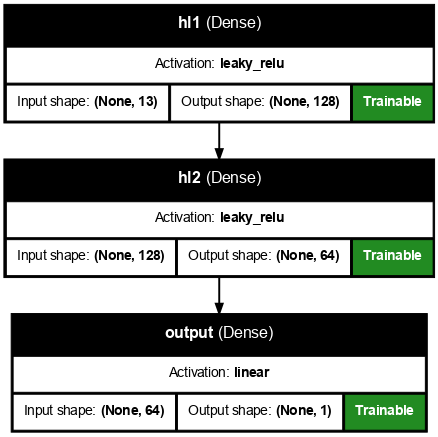

In [68]:
# visualize model
plot_model(
    model=model,
    show_dtype=False,
    show_shapes=True, 
    rankdir='TB',  # 'TB' for top-to-bottom layout, 'LR' for left-to-right
    show_layer_names=True,  # Optional: Shows layer names
    dpi=70,  # Reduce DPI to make it smaller
    expand_nested=True,  # Optional: Expands nested models if present
    show_layer_activations=True,
    show_trainable=True,
    # to_file='model.png' # File name of the plot image,
)

In [72]:
epochs=200
history=model.fit(x=X_train,y=y_train,epochs=epochs,verbose=1,batch_size=16,validation_data=(X_test,y_test))

Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1466482.5000 - mse: 1466482.5000 - val_loss: 1499.6678 - val_mse: 1499.6678
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3592.8218 - mse: 3592.8218 - val_loss: 22638.3809 - val_mse: 22638.3809
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8759.3057 - mse: 8759.3057 - val_loss: 510.6531 - val_mse: 510.6531
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1622.3916 - mse: 1622.3916 - val_loss: 3840.0034 - val_mse: 3840.0034
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 961.3051 - mse: 961.3051 - val_loss: 131.7869 - val_mse: 131.7869
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 227.0979 - mse: 227.0979 - val_loss: 80.6965 - val_mse: 80.6965
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 361.4569 - mse: 361.4569 - val_loss: 1449.2147 - val_mse: 1449.2147
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1444.8381 - mse: 1444.8381 - val_loss: 142.2

In [55]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

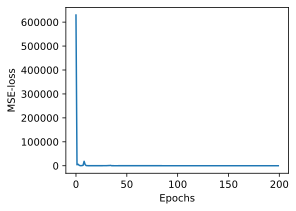

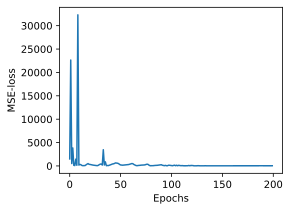

MAE loss: 4.702742099761963


In [73]:
pd.DataFrame(history.history['loss']).plot(figsize=(4,3),xlabel="Epochs",ylabel="MSE-loss",legend=False)
plt.show()
pd.DataFrame(history.history['val_loss']).plot(figsize=(4,3),xlabel="Epochs",ylabel="MSE-loss",legend=False)
plt.show()

# evaluating using MAE:
print(f"MAE loss: {tf.metrics.mae(tf.squeeze(y_test),tf.squeeze(model.predict(X_test,verbose=0))).numpy()}")